In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.drop(['key'],axis=1,inplace=True)

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<Axes: >

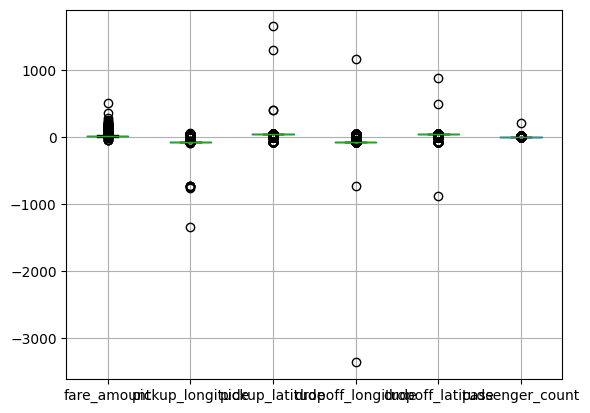

In [10]:
df.boxplot()

In [11]:
def remove_outliers(col_name,df):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)

    iqr = q3 - q1

    lowest_value = q1 - 1.5 * iqr
    highest_value = q3 + 1.5 * iqr

    df = df[(df[col_name]>= lowest_value) & (df[col_name]<=highest_value)]

    return df

col_list = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

for i in col_list:
    df = remove_outliers(i,df)

In [12]:
df.boxplot()

<Axes: >

In [13]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [15]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [16]:
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.160394,-0.052798,-0.076539,-0.023167,-0.094152,0.019572
pickup_datetime,0.160394,1.000000,-0.003281,-0.000884,0.003870,0.001759,-0.021697
pickup_longitude,-0.052798,-0.003281,1.000000,0.693656,0.409016,0.353741,-0.022952
pickup_latitude,-0.076539,-0.000884,0.693656,1.000000,0.334680,0.499956,-0.019989
dropoff_longitude,-0.023167,0.003870,0.409016,0.334680,1.000000,0.651683,-0.016413
dropoff_latitude,-0.094152,0.001759,0.353741,0.499956,0.651683,1.000000,-0.013321
passenger_count,0.019572,-0.021697,-0.022952,-0.019989,-0.016413,-0.013321,1.000000


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [18]:
df.shape

(148074, 7)

In [19]:
X = df.drop(columns = ['fare_amount','pickup_datetime'], axis=1)
Y = df['fare_amount']

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
lr = LinearRegression()
lr_fit = lr.fit(X_train,Y_train)
lr_pred = lr_fit.predict(X_test)

In [22]:
r2_score(Y_test,lr_pred)

0.013878076816334906

In [23]:
np.sqrt(mean_squared_error(Y_test,lr_pred))

3.8715368852615604

In [24]:
rf = RandomForestRegressor()
rf_fit = rf.fit(X_train,Y_train)
rf_pred = rf_fit.predict(X_test)

In [25]:
r2_score(Y_test,rf_pred)

0.7065257607948846

In [26]:
np.sqrt(mean_squared_error(Y_test,rf_pred))

2.112044609889424